# Examen

En este notebook de Jupyter haremos los gráficos que posteriormente usaremos para la entrega final en forma de tríptico. El tema a investigar a través de representaciones gráficas generadas por computador es el de como se puede generar rankings en la promoción de artes marciales mixtas Ultimate Fighting Championship (UFC). Para ver esto se creó un método de ranking llamado HD y se comparó contra una base de datos que contiene los valores de los puntajes de ranking "entrega-final/nkshv/ELO/ELO-scraper/src/test.py"

In [45]:
import pandas as pd
import hashlib
import matplotlib.pyplot as plt

### Primera parte:
## Manejo de bases de datos




Primero cargamos las bases de datos que contiene los valores de las peleas de la UFC.



In [30]:
#we load the data
fighter_stats = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/complete/fighter_stats.csv')
fights_stats = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/complete/large_dataset.csv')
event_stats = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/complete/medium_dataset.csv')
odds_stats = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/odds/ufc-master.csv')

## Creación de la base de datos de ranking ELO


Para crear la base de datos de ranking ELO se utilizó el código entrega-final/nkshv/ELO/ELO-scraper/src/ufc_ranking_elo.py Este código se encarga de obtener los valores de los rankings de la UFC y los guarda en un archivo csv. Supone que el archivo de rankings ya existe y que se encuentra en la carpeta /entrega-final/nkshv/ELO/ELO-scraper/csv/UFC_db.csv

In [31]:
#we load the data
elo_stats = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/nkshv/ELO/ELO-scraper/csv/UFC_db.csv')

## Creación de la base de datos de ranking HD


Para crear esta base de datos, debemos hacer un proceso muy similar al que nkshv creo para el ranking ELO. Para esto se utilizó el código entrega-final/HD-scraper/src/ufc_ranking_hd.py Este código se encarga de obtener los valores de los rankings de la UFC calculados como (peleas_ganadas_por_peleador_x+promedio_historico_de_peleas_ganadas)/(peleas_perdidas_por_peleador_y+promedio_historico_de_peleas_perdidas) y los guarda en un archivo CSV. Este archivo debe ser escrito en la carpeta /entrega-final/HD-scraper/csv/UFC_db.csv



In [32]:
#headers of large_dataset.csv
### event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,time_sec,referee,r_kd,r_sig_str,r_sig_str_att,r_sig_str_acc,r_str,r_str_att,r_str_acc,r_td,r_td_att,r_td_acc,r_sub_att,r_rev,r_ctrl_sec,r_wins_total,r_losses_total,r_age,r_height,r_weight,r_reach,r_stance,r_SLpM_total,r_SApM_total,r_sig_str_acc_total,r_td_acc_total,r_str_def_total,r_td_def_total,r_sub_avg,r_td_avg,b_kd,b_sig_str,b_sig_str_att,b_sig_str_acc,b_str,b_str_att,b_str_acc,b_td,b_td_att,b_td_acc,b_sub_att,b_rev,b_ctrl_sec,b_wins_total,b_losses_total,b_age,b_height,b_weight,b_reach,b_stance,b_SLpM_total,b_SApM_total,b_sig_str_acc_total,b_td_acc_total,b_str_def_total,b_td_def_total,b_sub_avg,b_td_avg,kd_diff,sig_str_diff,sig_str_att_diff,sig_str_acc_diff,str_diff,str_att_diff,str_acc_diff,td_diff,td_att_diff,td_acc_diff,sub_att_diff,rev_diff,ctrl_sec_diff,wins_total_diff,losses_total_diff,age_diff,height_diff,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff


#headers of medium_dataset.csv
###event,date,location,r_fighter,b_fighter,status,r_kd,b_kd,r_str,b_str,r_td,b_td,r_sub,b_sub,weight_class,method,method_detailed,round,time

#headers of decisive.csv
#Year,	Total Fights,	(T)KOs,	Submissions,	Total Decisions,	No Contests,	DQs


# Open the file "large_dataset.csv"
data =  pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/complete/large_dataset.csv')


# we should join the data with the medium_dataset.csv to get the date of the fight
# data shares a column called "event_name" with event_stats' column "event"
data = pd.merge(data, event_stats, left_on='event_name', right_on='event', how='left')

# in the data df, there aren't any no contest fights, so we have to use a different source to get historical_average_fights_won and historical_average_fights_lost
"""
# preprocessing the data:
# we should calculate the requirements to make (fights_won_by_fighter_x + historical_average_fights_won) / (fights_lost_by_fighter_y + historical_average_fights_lost) functional

# we should then calculate:
# historical_average_fights_won
# and
# historical_average_fights_lost
# we count total decisive fights as any fight which "winner" value is either "Red" or "Blue"
historical_total_decisive_fights = data[(data["winner"] == "Red") | (data["winner"] == "Blue")].shape[0]
# we count total fights in data
total_fights = data.shape[0]
historical_average_fights_won = historical_total_decisive_fights / total_fights
historical_average_fights_lost = historical_average_fights_won


print(total_fights)
print(historical_total_decisive_fights)
print(historical_average_fights_lost)
"""
# we got the data from https://www.fightmatrix.com/ufc-records/ufc-fight-outcomes/
# and we saved it in a csv file called "/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/decisive/decisive.csv"
decisive = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/decisive/decisive.csv')
# total_fights is the sum of the column called "Total Fights"
total_fights = decisive["Total Fights"].sum()
total_no_contests = decisive["No Contests"].sum()
#print(total_fights)
#print(total_no_contests)
historical_total_decisive_fights = total_fights - total_no_contests
historical_average_fights_won = historical_total_decisive_fights / total_fights
historical_average_fights_lost = historical_average_fights_won
#print(historical_average_fights_won)
#print(historical_average_fights_lost)

# 1% of the fights are no contests

In [33]:


# Create the new csv file "elo.csv" with the specified columns

# Function to generate a unique id
def generate_id(name, date):
    n = str(name)
    d = str(date)
    return hashlib.sha3_512((n + d).encode()).hexdigest()

# Function to generate the result of the fight as
def result_to_redWon(winner,isRed):
    if isRed:
        if winner == "Red":
            return 1
        else:
            return 0
    else:
        if winner == "Blue":
            return 0
        else:
            return 1


In [34]:
# we should split the data into a dataframe twice as large as the original one
# for each row in the original dataframe we should create two rows in the new dataframe
# one for each fighter

# for each line in the dataset we create two new lines with the same information but with the fighters by means of swapping the columns "fighter" and "opponent"
# we should add the ids by means of the function generate_id
# we should add the information of the result by means of the function result_to_int(r_fighter,b_fighter,winner,isRed)
# we should add the date from the column "date"
# the name column should reflect the name of the fighter in the red corner if "isRed" or the one in the blue corner otherwise
# wins_to_date, losses_to_date and HD values should be initialized at 0
# in the first line the fighter is the red corner and in the second line the fighter is the blue corner, this should be reflected in the column "isRed"
# the data should, then, be sorted by date
# using pandas:

HD_rows = []
for index, row in data.iterrows():
    HD_rows.append([generate_id(row["r_fighter_x"],row["date"]),row["r_fighter_x"],row["b_fighter_x"],result_to_redWon(row["winner"],True),row["date"],0,0,0,1])
    HD_rows.append([generate_id(row["b_fighter_x"],row["date"]),row["b_fighter_x"],row["r_fighter_x"],result_to_redWon(row["winner"],False),row["date"],0,0,0,0])

In [61]:
HD = pd.DataFrame(HD_rows, columns = ["id","fighter","opponent","redWon","date","wins_to_date","losses_to_date","HD","isRed"])

In [62]:
# we should sort the data of HD by date
HD = HD.sort_values(by=["date"])
# from the earliest date to the latest date, we should calculate the HD value for each fighter, updating the wins_to_date and losses_to_date columns
# we should then save the HD value in the HD column
# remember that the HD value is calculated as (wins_to_date + historical_average_fights_won) / (losses_to_date + historical_average_fights_lost)
# we have calculated historical_average_fights_won and historical_average_fights_lost before
# we should iterate over the rows of the dataframe
# we should calculate the HD value for each row

for index, row in HD.iterrows():
    if (row["isRed"] and row["redWon"]) or (not row["isRed"] and not row["redWon"]):
        HD.at[index,"wins_to_date"] += 1
    else:
        HD.at[index,"losses_to_date"] += 1
    tempHD = (HD.at[index,"wins_to_date"] + historical_average_fights_won) / (HD.at[index,"losses_to_date"] + historical_average_fights_lost)
    HD["HD"] = HD["HD"].astype(float)
    HD.at[index, "HD"] = tempHD


In [63]:
# we save the HD dataframe in a csv file
# in data/HD/HD.csv
HD.to_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/HD/HD.csv', index=False)

In [81]:
# we load the data
HD2 = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/HD/HD.csv')

# we make a graph about the top 10 HD values of the fighters
# we should sort the HD dataframe by HD value
HD2 = HD2.sort_values(by=["HD"],ascending=False)
HD2 = HD2.reset_index(drop=True)
# we should remove repeated fighters in the top 100, to get a top 10

toPlot = []
fighters_set = set()
for index, row in HD2.iterrows():
    if len(toPlot) < 10:
        if row["fighter"] not in fighters_set:
            toPlot.append((row["fighter"], row["HD"]))
            fighters_set.add(row["fighter"])
    else:
        break

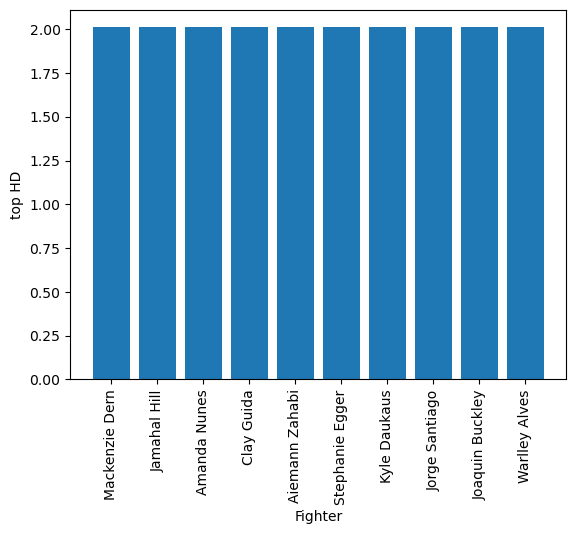

In [82]:

# we should plot the top 10 fighters by HD value
fig, ax = plt.subplots()
ax.bar([x[0] for x in toPlot],[x[1] for x in toPlot])
ax.set_ylabel('top HD')
ax.set_xlabel('Fighter')
plt.xticks(rotation=90)
plt.show()


In [89]:
# we do the same but only keeping the latest HD value of each fighter
HD3 = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/HD/HD.csv')
#we got to reformat the date column from string to datetime
HD3['date'] = pd.to_datetime(HD3['date'])

HD3 = HD3.sort_values(by=["date"],ascending=False)
# we only keep the latest entry for fighter
fighters_dic = {}
for index, row in HD3.iterrows():
    if row["fighter"] in fighters_dic.keys():
        pass
    else:
        fighters_dic[row["fighter"]] = row["HD"]

In [87]:
print(fighters_dic)


{'Robert Lucarelli': 0.4976623029655356, 'Royce Gracie': 2.009394712119178, 'Patrick Smith': 0.4976623029655356, 'Remco Pardoel': 0.4976623029655356, 'Scott Morris': 2.009394712119178, 'Johnny Rhodes': 2.009394712119178, 'Fred Ettish': 0.4976623029655356, 'Orlando Wiet': 0.4976623029655356, 'Jason DeLucia': 0.4976623029655356, 'Alberta Cerra Leon': 0.4976623029655356, 'Scott Baker': 0.4976623029655356, 'Sean Daugherty': 0.4976623029655356, 'Ray Wizard': 0.4976623029655356, 'David Levicki': 0.4976623029655356, 'Minoki Ichihara': 0.4976623029655356, 'Frank Hamaker': 2.009394712119178, 'Thaddeus Luster': 0.4976623029655356, 'Kimo Leopoldo': 0.4976623029655356, 'Ken Shamrock': 2.009394712119178, 'Felix Lee Mitchell': 0.4976623029655356, 'Harold Howard': 0.4976623029655356, 'Roland Payne': 0.4976623029655356, 'Steve Jennum': 2.009394712119178, 'Keith Hackney': 2.009394712119178, 'Emmanuel Yarborough': 0.4976623029655356, 'Christophe Leninger': 0.4976623029655356, 'Marcus Bossett': 0.4976623

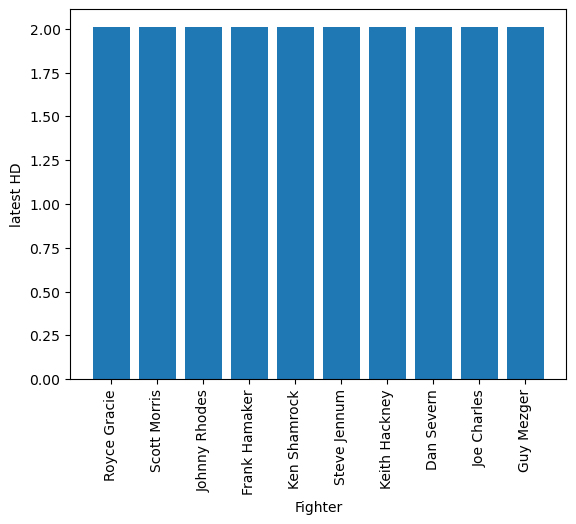

In [88]:

# we sort fighters_dic by HD value
fighters_dic = dict(sorted(fighters_dic.items(), key=lambda item: item[1], reverse=True))
# we keep the top 10
fighters_dic = dict(list(fighters_dic.items())[:10])
# we plot the top 10
fig, ax = plt.subplots()
ax.bar(fighters_dic.keys(),fighters_dic.values())
ax.set_ylabel('latest HD')
ax.set_xlabel('Fighter')
plt.xticks(rotation=90)
plt.show()